In [1]:
import os
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import random

import keras.backend as K
from keras.models import load_model

C:\Users\Rock_\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# YOLO

In [2]:
grid_w = 7
grid_h = 3

def load_photos(directory):
    images = []
    presences = []
    x_labels_loc = []
    y_labels_loc = []
    class_labels_loc = []
    dir_list = os.listdir(directory)
    random.shuffle(dir_list)
    for name in dir_list:
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename)
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        images.append(image)
        # get labels
        presences.append(int(name.split('_')[1]))
        x_labels_loc.append(int(float(name.split('_')[2]) * (grid_w)))
        y_labels_loc.append(int(float(name.split('_')[3].split('.png')[0]) * (grid_h)))
    return images, presences, x_labels_loc, y_labels_loc

In [3]:
dataset = "Yolo_Datas/"

# load images from both train and test groups
directory = dataset + 'Val'
images, presences, x_labels_loc, y_labels_loc = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)

Loaded Images and labels for training: 311


In [4]:
#Normalise images
images = np.array(images)
images /= 255.0

In [13]:
model = load_model("../model_YOLO_81.h5")

In [14]:
# Get predictions
all_preds = model.predict(images)

In [15]:
pres_preds = []
for elem in all_preds[0]:
    pres_preds.append(np.argmax(elem))
x_loc_preds = []
for elem in all_preds[1]:
    x_loc_preds.append(np.argmax(elem))
y_loc_preds = []
for elem in all_preds[2]:
    y_loc_preds.append(np.argmax(elem))

In [16]:
x_tot = []
y_tot = []
x_correct = []
y_correct = []
for i, image in enumerate(images):
    print(x_labels_loc[i] - x_loc_preds[i], y_labels_loc[i] - y_loc_preds[i])
    x_tot.append(x_labels_loc[i] - x_loc_preds[i])
    y_tot.append(y_labels_loc[i] - y_loc_preds[i])
    if x_labels_loc[i] - x_loc_preds[i] == 0:
        x_correct.append(x_labels_loc[i] - x_loc_preds[i])
    if y_labels_loc[i] - y_loc_preds[i] == 0:
        y_correct.append(y_labels_loc[i] - y_loc_preds[i])
print("\n")
print("total error", np.sum(x_tot))
print("total error", np.sum(y_tot))
print("\n")
print("x error proportion", 1 - (len(x_correct) / len(x_tot)))
print("y error proportion", 1 - (len(y_correct) / len(y_tot)))

0 0
0 0
0 0
0 0
-1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 -1
-3 -1
1 0
0 0
0 0
0 0
0 0
-1 0
0 0
0 -1
0 0
1 0
0 -1
0 -1
0 0
0 1
0 0
1 0
-1 1
0 0
0 0
0 0
0 0
1 0
0 0
0 -1
0 0
0 0
1 0
0 0
0 0
0 1
1 0
0 0
0 0
0 0
0 0
0 0
-1 0
0 0
0 1
0 0
0 0
0 0
1 0
0 0
1 0
0 0
-1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
2 0
0 0
1 0
0 0
1 0
2 0
0 -1
1 0
0 0
1 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 -1
2 0
0 0
0 1
0 0
0 0
0 0
0 0
-1 0
0 0
3 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
4 0
0 0
0 0
3 0
4 1
0 0
0 0
-2 0
0 0
0 0
0 0
0 0
0 0
0 0
3 0
5 0
0 0
1 0
0 0
0 0
0 0
0 0
4 1
0 0
0 0
0 0
0 0
-1 0
0 1
0 0
-1 0
0 0
-2 -1
0 0
0 0
0 0
0 1
0 -1
0 0
0 0
0 0
-1 0
0 0
0 1
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
-2 0
0 0
0 0
0 0
0 -1
0 0
0 0
0 0
0 0
0 0
0 0
0 -1
0 0
1 0
0 0
0 0
0 0
-2 0
0 0
0 0
-1 0
0 0
0 0
0 0
1 0
0 1
0 0
0 0
0 0
0 -1
1 0
0 1
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
-1 -1
0 0
0 1
4 1
0 0
0 0
0 0
0 0
-1 -1
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
1 0
0 0
0 0
0 0


# YOLO_V3

In [2]:
grid_w = 7
grid_h = 3

def load_photos(directory):
    images = []
    presences = []
    x_labels_loc = []
    y_labels_loc = []
    class_labels_loc = []
    dir_list = os.listdir(directory)
    random.shuffle(dir_list)
    for name in dir_list:
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename)
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        images.append(image)
        # get labels
        presences.append(int(name.split('_')[1]))
        x_labels_loc.append(int(float(name.split('_')[2]) * (grid_w)))
        y_labels_loc.append(int(float(name.split('_')[3].split('.png')[0]) * (grid_h)))
    return images, presences, x_labels_loc, y_labels_loc

In [3]:
dataset = "Yolo_Datas/"

# load images from both train and test groups
directory = dataset + 'Val'
images, presences, x_labels_loc, y_labels_loc = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)

Loaded Images and labels for training: 311


In [4]:
#Normalise images
images = np.array(images)
images /= 255.0

# build YOLOV3 labels
labels = []
for i, presence in enumerate(presences):
    if presence == 0:
        labels.append(np.zeros((grid_h, grid_w)))
    else:
        label = np.zeros((grid_h, grid_w))
        label[y_labels_loc[i], x_labels_loc[i]] = 1
        labels.append(label)
labels = np.array(labels).reshape((len(labels), grid_h, grid_w, 1))

In [5]:
images.shape

(311, 240, 320, 3)

In [6]:
model = load_model("model_YOLO_V3_l.h5")

In [7]:
# Get predictions
all_preds = model.predict(images)
all_preds_max = [np.argmax(pred) for pred in all_preds]

In [8]:
print(all_preds, all_preds_max)

[[[[-3.80851626e-01]
   [-3.79285902e-01]
   [-2.98567891e-01]
   ...
   [-2.34608538e-02]
   [-1.61676519e-02]
   [-5.43629518e-03]]

  [[ 1.00000508e-01]
   [ 1.58795074e-01]
   [ 2.02765256e-01]
   ...
   [ 1.27876729e-01]
   [ 1.32501483e-01]
   [ 1.01547040e-01]]

  [[ 2.73077749e-03]
   [-2.84076872e-04]
   [ 2.93788817e-02]
   ...
   [ 8.59925002e-02]
   [ 1.24565363e-02]
   [-3.07812891e-03]]]


 [[[-1.04161678e-02]
   [-3.31622846e-02]
   [-1.06740044e-02]
   ...
   [-1.54718161e-02]
   [-1.75305270e-02]
   [-1.79736074e-02]]

  [[ 2.22074255e-01]
   [ 1.84341490e-01]
   [ 1.32491486e-02]
   ...
   [ 1.27772152e-01]
   [ 1.09672554e-01]
   [ 8.85735005e-02]]

  [[ 1.25054389e-01]
   [ 1.73403129e-01]
   [ 1.68871671e-01]
   ...
   [ 1.71233594e-01]
   [ 1.68827787e-01]
   [ 1.55219972e-01]]]


 [[[-1.91445127e-02]
   [-2.03554854e-02]
   [-3.93458381e-02]
   ...
   [-1.05961785e-02]
   [-1.51115926e-02]
   [ 6.39033876e-03]]

  [[ 1.71192333e-01]
   [ 6.40592054e-02]
   [ 1.61

0 0 0
0 6
(240, 320, 3)


<IPython.core.display.Javascript object>


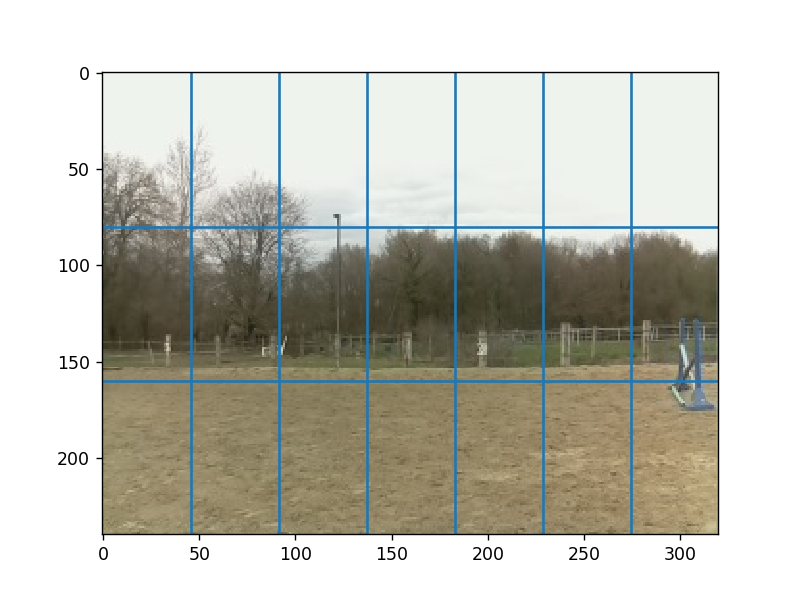

In [11]:
idx = 42
print(presences[idx], x_labels_loc[idx], y_labels_loc[idx])

print(np.argmax(labels[idx]), all_preds_max[idx])

print(images[idx].shape)

plt.imshow(images[idx])
for line in range(1, grid_h):
    plt.axhline(line * images[idx].shape[0] / grid_h)
for col in range(1, grid_w):
    plt.axvline(col * images[idx].shape[1] / grid_w)

In [10]:
diff = []
for idx, img in enumerate(images):
    diff.append(np.argmax(labels[idx]) - np.argmax(all_preds[idx]))
    print(np.argmax(labels[idx]), np.argmax(all_preds[idx]), diff[idx])

11 9 2
7 7 0
11 11 0
11 6 5
11 0 11
10 10 0
18 12 6
15 9 6
14 9 5
11 11 0
10 2 8
12 12 0
9 9 0
0 13 -13
18 11 7
11 5 6
9 9 0
18 18 0
10 10 0
8 11 -3
12 12 0
10 10 0
9 9 0
11 18 -7
15 9 6
0 9 -9
11 18 -7
10 10 0
11 11 0
9 9 0
19 12 7
10 11 -1
11 11 0
8 8 0
12 7 5
9 14 -5
10 10 0
11 11 0
0 18 -18
15 8 7
10 11 -1
9 9 0
0 6 -6
12 12 0
10 10 0
9 14 -5
11 11 0
16 8 8
9 0 9
10 10 0
7 11 -4
18 10 8
8 14 -6
11 19 -8
10 10 0
20 16 4
0 10 -10
10 12 -2
0 14 -14
18 10 8
10 7 3
13 7 6
20 12 8
11 11 0
8 8 0
10 10 0
0 9 -9
17 17 0
11 6 5
9 14 -5
19 12 7
7 11 -4
8 8 0
9 14 -5
10 10 0
10 10 0
15 7 8
18 11 7
16 9 7
9 9 0
15 8 7
0 14 -14
9 14 -5
7 12 -5
13 7 6
9 1 8
12 12 0
11 9 2
18 10 8
11 11 0
9 10 -1
14 20 -6
10 14 -4
10 10 0
9 9 0
10 7 3
11 7 4
17 12 5
9 9 0
9 9 0
10 6 4
11 17 -6
17 9 8
0 6 -6
7 12 -5
9 9 0
10 12 -2
20 15 5
15 13 2
11 10 1
10 10 0
11 7 4
10 10 0
13 7 6
8 8 0
18 18 0
15 14 1
11 6 5
10 10 0
16 11 5
12 12 0
10 7 3
8 8 0
9 9 0
11 11 0
16 3 13
11 11 0
9 0 9
18 2 16
10 10 0
9 9 0
11 6 5
10